In [4]:
# import libraries
from dash import Dash, dcc, html, Input, Output, callback
import pandas as pd
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
import mpld3
import plotly.tools as tls
from io import BytesIO
import base64

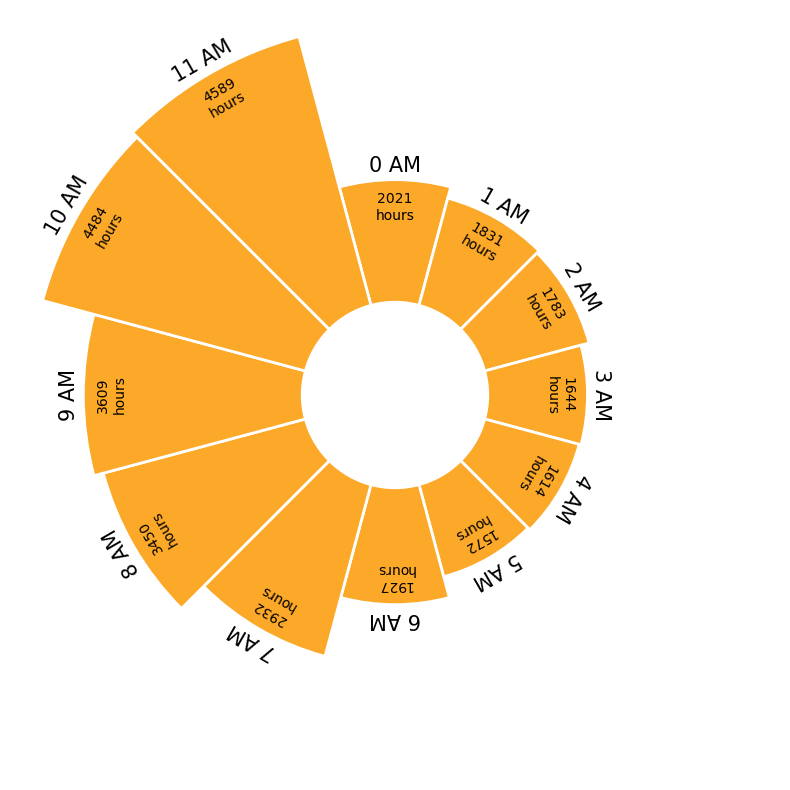

In [2]:
data = pd.read_csv('../DATA/data.csv')

## group by the hour of the day and find the number of minutes 
hours = data.groupby('hour')['minutes'].sum()
# change the index 

hours.index = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, \
               3, 4, 5, 6, 7, 8, 9, 10, 11]
hoursam = hours.iloc[:12]
hourspm = hours.iloc[12:]

allhours = [hoursam, hourspm]

#initialize the plot 
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')


# Compute max and min in the dataset
max = hoursam.max()

# Set the coordinates limits
upperLimit = max
lowerLimit = max/3

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * hoursam + lowerLimit

#Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(hoursam.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(hoursam)+1))
angles = [element * width * -1 + np.deg2rad(120) for element in indexes]


# add bars 
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#fca828",
)

# little space between the bar and the label
labelPadding = max/20


# Add labels
for bar, angle, height, label in zip(bars,angles, heights, hoursam.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)-90

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() - 2*labelPadding, 
        s=f'{round(height)}\nhours', 
        ha='center', 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 


# Add more lables labels
for bar, angle, height, label in zip(bars,angles, heights, hoursam.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)-90

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=f'{label} AM', 
        ha='center', 
        va='center',
        size = 15,
        rotation=rotation, 
        rotation_mode="anchor") 
    



In [ ]:
data_filtered = data[data['date'].between('03-01-2023', '03-11-2023')]
hours = data_filtered.groupby('hour')['minutes'].sum()

new = hours.reindex(range(24), fill_value= 0)
hours

In [14]:
# Build a dataset
import pandas as pd
import numpy as np
df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=0, high=100, size=50)
        })

df['Value'].iloc[0] = 0
df

/var/folders/wq/0drp36md1ndchmcfz02rx9tw0000gn/T/ipykernel_1803/4247594242.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Value
0,item 1,0
1,item 2,66
2,item 3,35
3,item 4,91
4,item 5,11
5,item 6,4
6,item 7,93
7,item 8,66
8,item 9,14
9,item 10,20


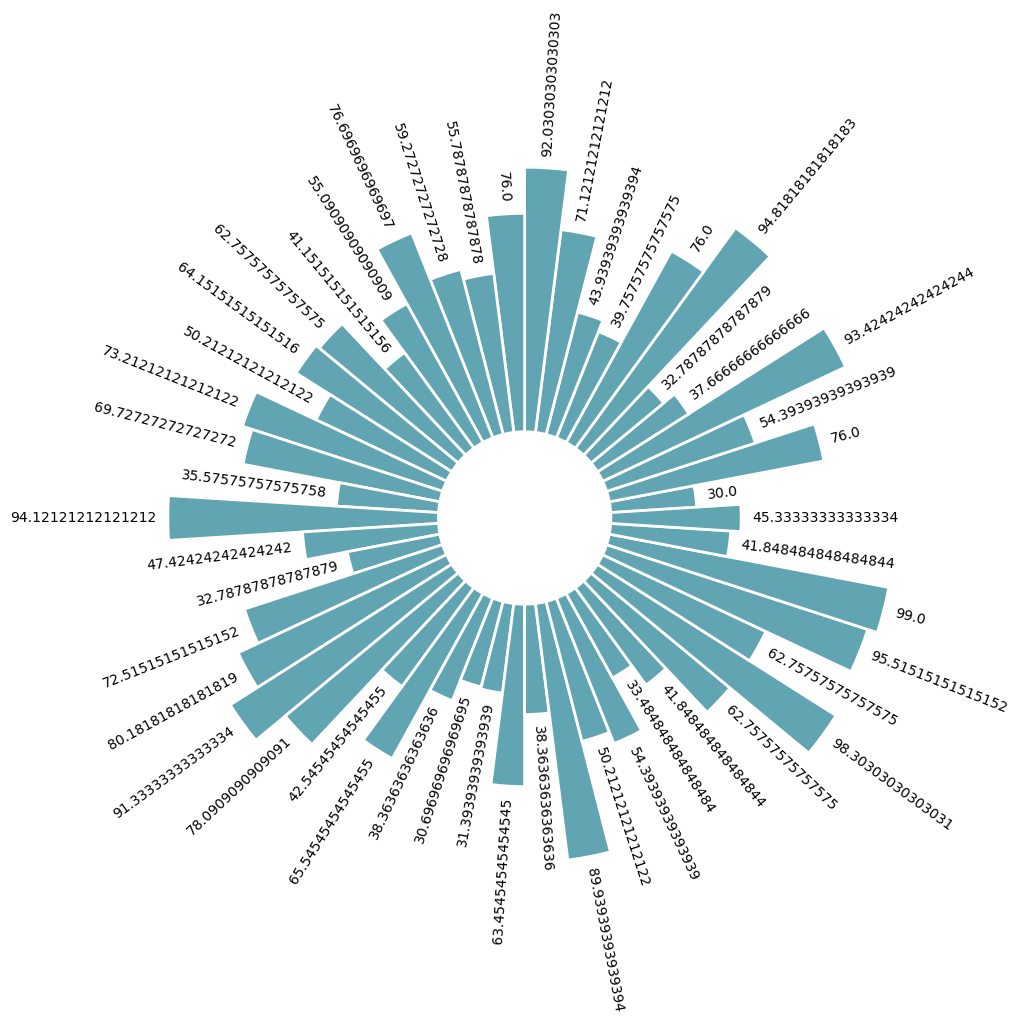

In [15]:
# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=bar.get_height(), 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor")